In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:

df = pd.read_csv('/content/drive/MyDrive/winequality-red.csv')


In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:


df.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


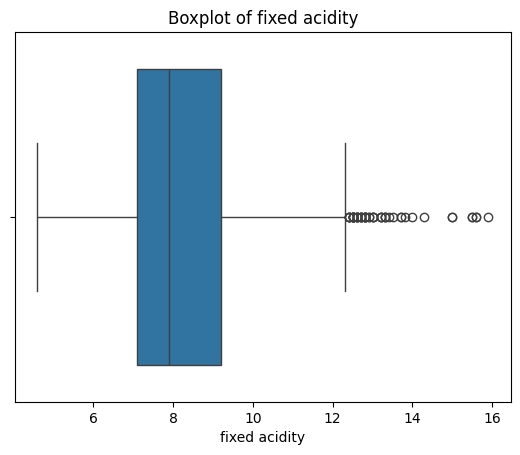

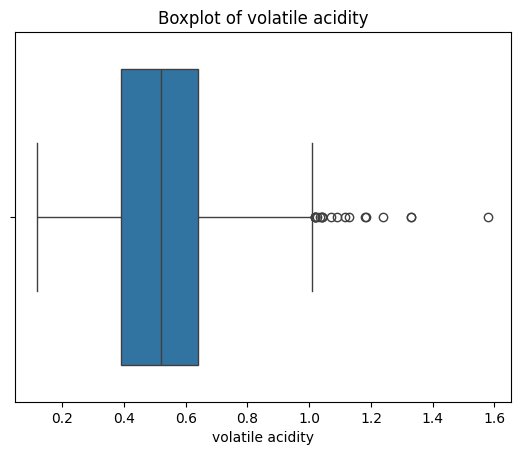

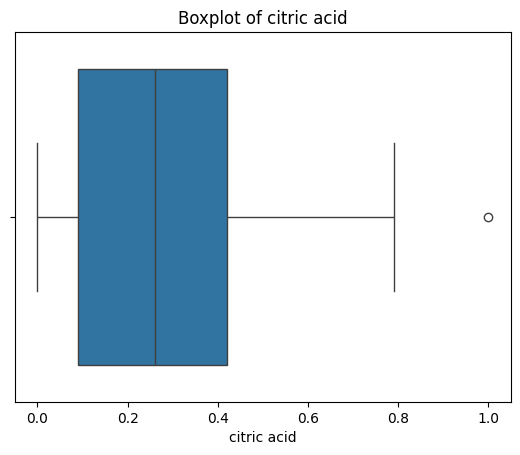

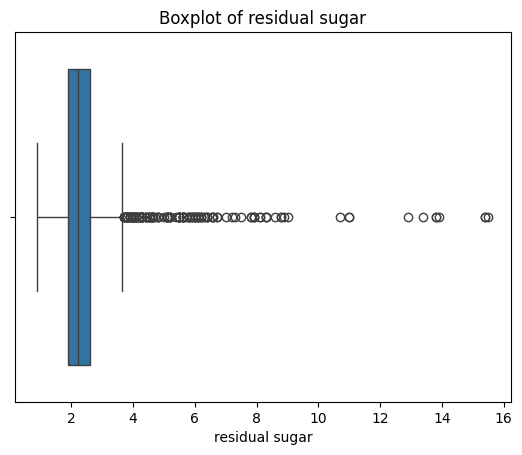

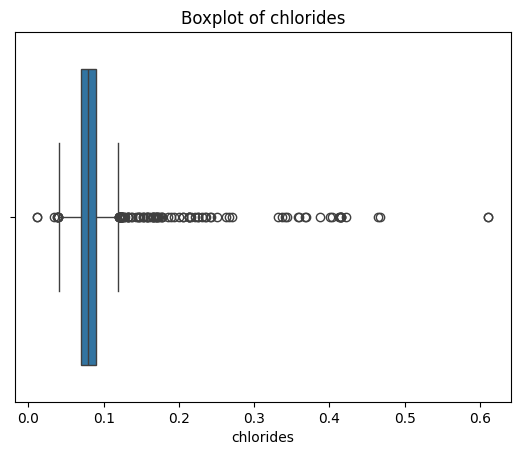

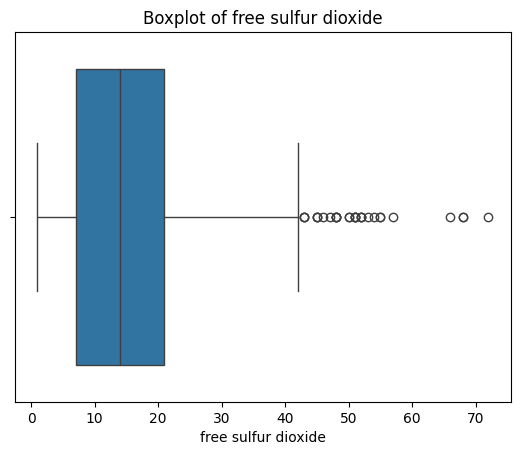

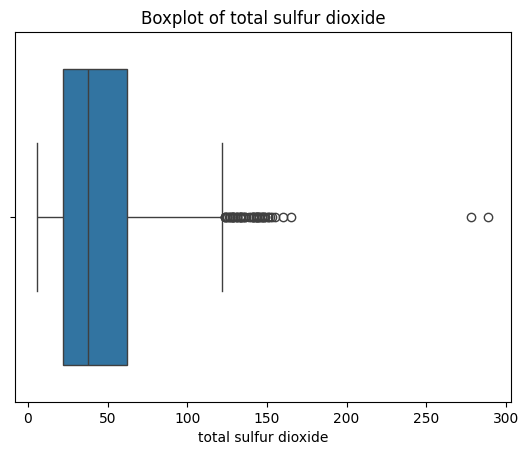

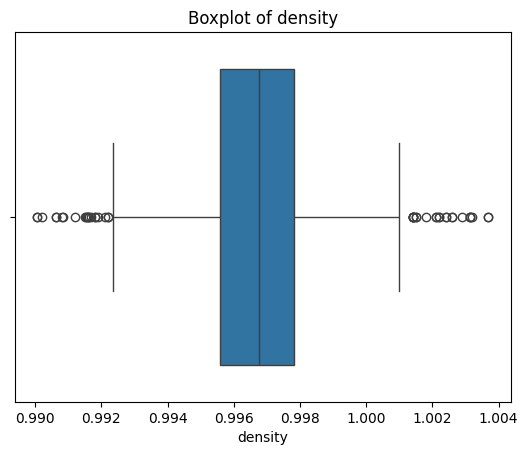

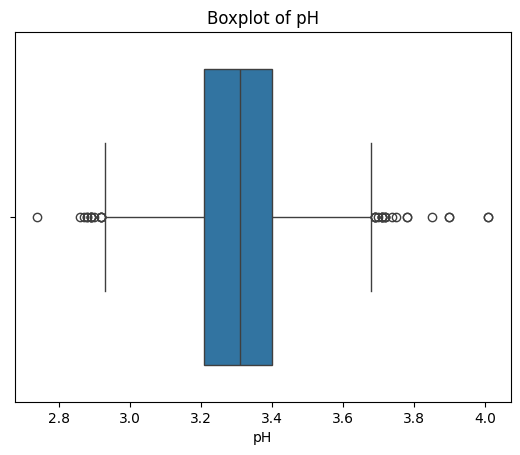

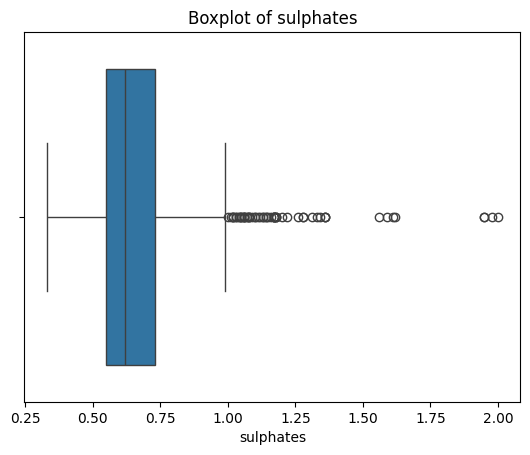

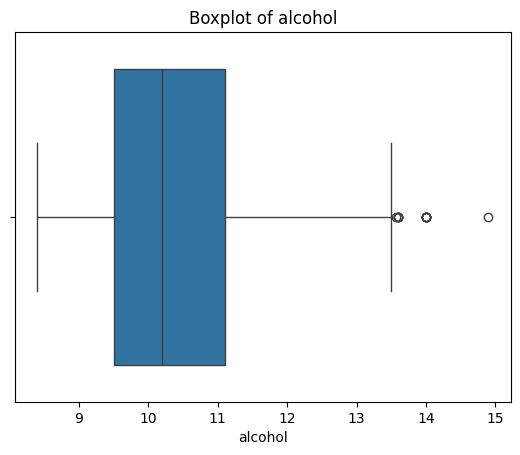

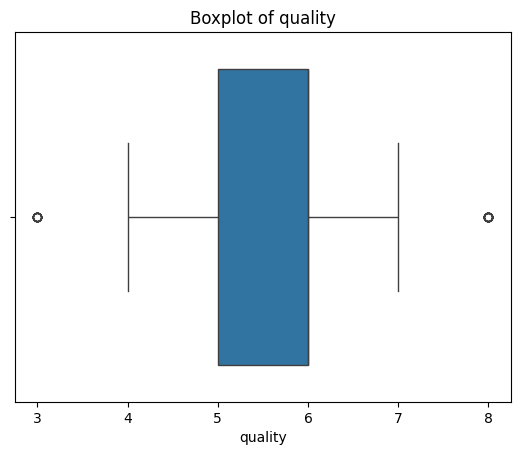

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt # Import the matplotlib library

# Create a boxplot for each column
for col in df.columns:
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot of {col}')
  plt.show()


In [ ]:
## Calculating the IQR for each feature to identify outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Identifying outliers
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)
outlier_indices = df[outliers].index

# Count of outliers
outlier_count = outliers.sum()

# Preparing a summary of outliers
outlier_summary = pd.DataFrame()
outlier_summary["Feature"] = IQR.index
outlier_summary["IQR"] = IQR.values
outlier_summary["Lower Bound"] = (Q1 - 1.5 * IQR).values
outlier_summary["Upper Bound"] = (Q3 + 1.5 * IQR).values

outlier_summary, outlier_count, df.loc[outlier_indices].head()


(                 Feature        IQR  Lower Bound  Upper Bound
 0          fixed acidity   2.100000     3.950000    12.350000
 1       volatile acidity   0.250000     0.015000     1.015000
 2            citric acid   0.330000    -0.405000     0.915000
 3         residual sugar   0.700000     0.850000     3.650000
 4              chlorides   0.020000     0.040000     0.120000
 5    free sulfur dioxide  14.000000   -14.000000    42.000000
 6   total sulfur dioxide  40.000000   -38.000000   122.000000
 7                density   0.002235     0.992248     1.001187
 8                     pH   0.190000     2.925000     3.685000
 9              sulphates   0.180000     0.280000     1.000000
 10               alcohol   1.600000     7.100000    13.500000
 11               quality   1.000000     3.500000     7.500000,
 420,
     fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 9             7.5              0.50         0.36             6.1      0.071   
 11           

In [ ]:
# Capping outliers for each column individually using the lower and upper bounds calculated previously
# Lower Value (LV) and Upper Value (UV) capping
capped_df = df.copy()

for feature in Q1.index:
    LV = Q1[feature] - 1.5 * IQR[feature]
    UV = Q3[feature] + 1.5 * IQR[feature]
    capped_df[feature] = df[feature].clip(lower=LV, upper=UV)

# Comparing original vs capped dataset statistics for the first few features to see the effect
original_stats = df.describe()
capped_stats = capped_df.describe()

original_stats.iloc[:, :5], capped_stats.iloc[:, :5]



(       fixed acidity  volatile acidity  citric acid  residual sugar  \
 count    1599.000000       1599.000000  1599.000000     1599.000000   
 mean        8.319637          0.527821     0.270976        2.538806   
 std         1.741096          0.179060     0.194801        1.409928   
 min         4.600000          0.120000     0.000000        0.900000   
 25%         7.100000          0.390000     0.090000        1.900000   
 50%         7.900000          0.520000     0.260000        2.200000   
 75%         9.200000          0.640000     0.420000        2.600000   
 max        15.900000          1.580000     1.000000       15.500000   
 
          chlorides  
 count  1599.000000  
 mean      0.087467  
 std       0.047065  
 min       0.012000  
 25%       0.070000  
 50%       0.079000  
 75%       0.090000  
 max       0.611000  ,
        fixed acidity  volatile acidity  citric acid  residual sugar  \
 count    1599.000000       1599.000000  1599.000000     1599.000000   
 mean  

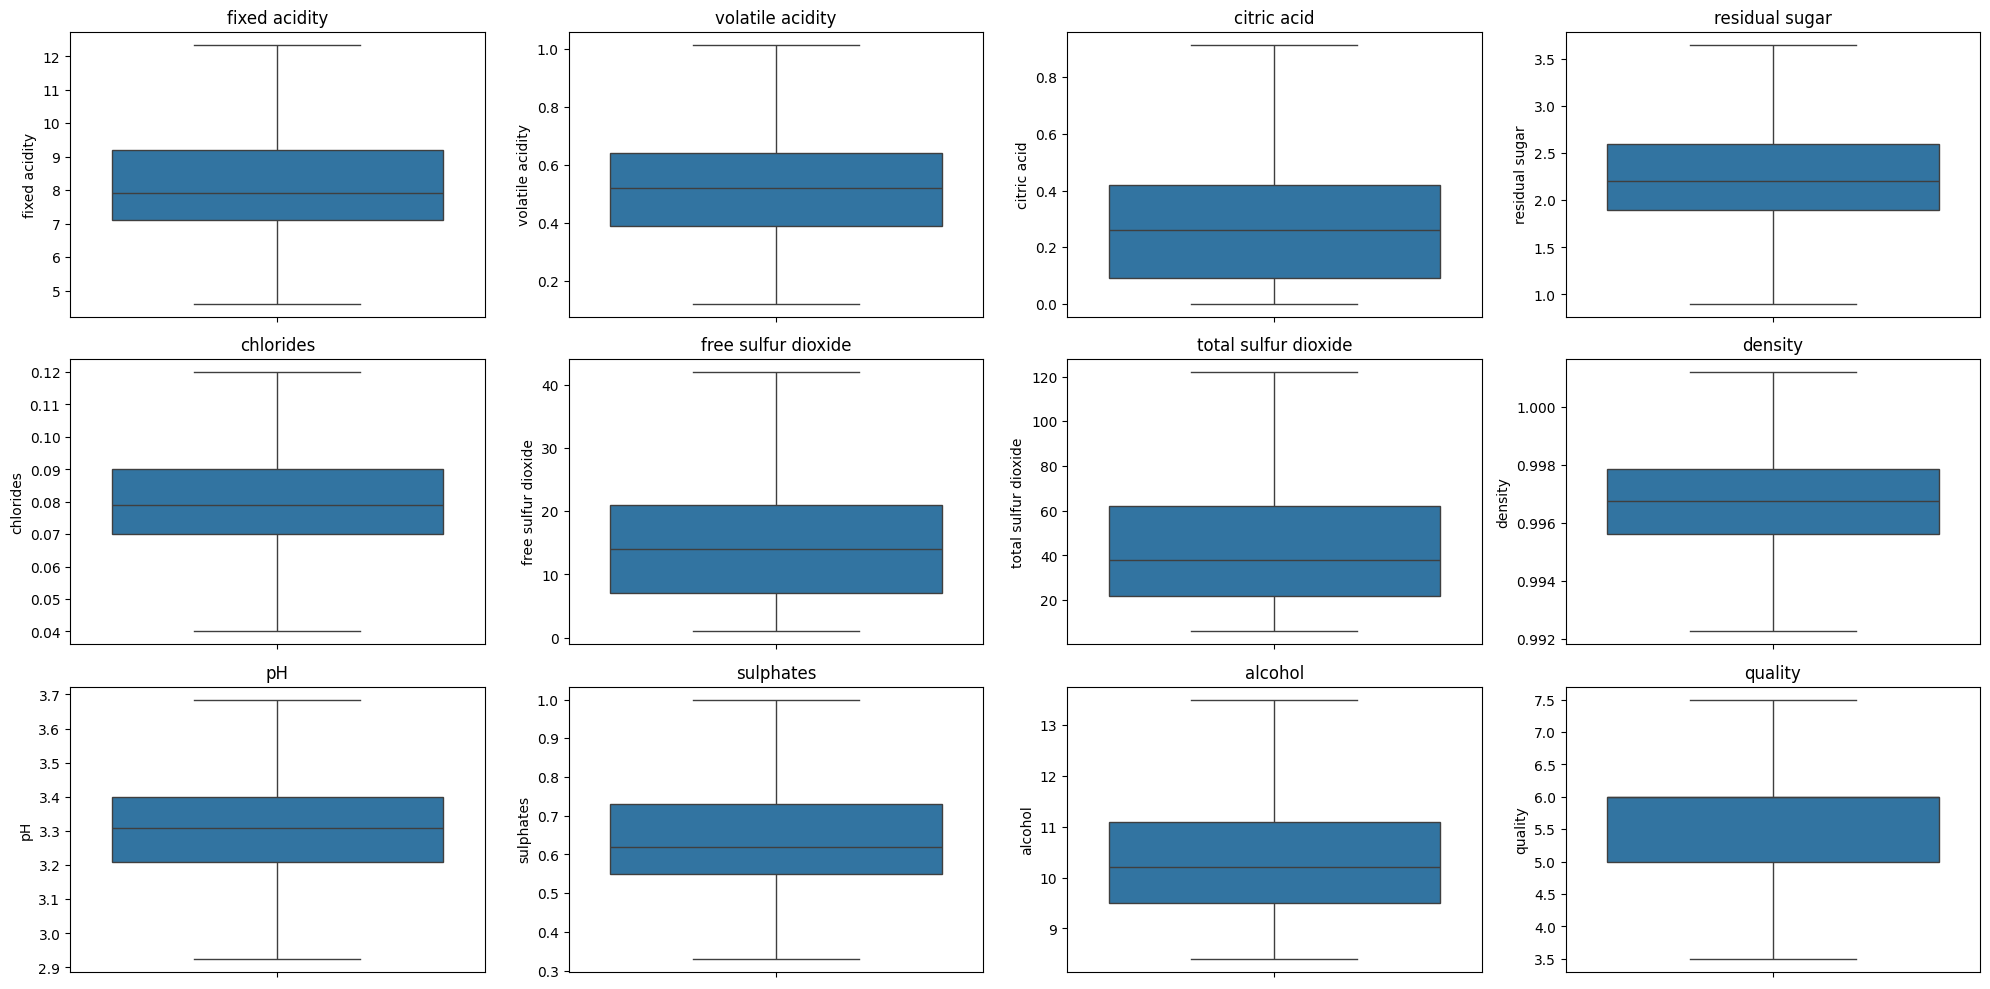

In [ ]:
import matplotlib.pyplot as plt

# Setting up the matplotlib figure
plt.figure(figsize=(20, 10))

# Plotting boxplots for each feature in the dataset
for i, column in enumerate(capped_df.columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(data=capped_df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

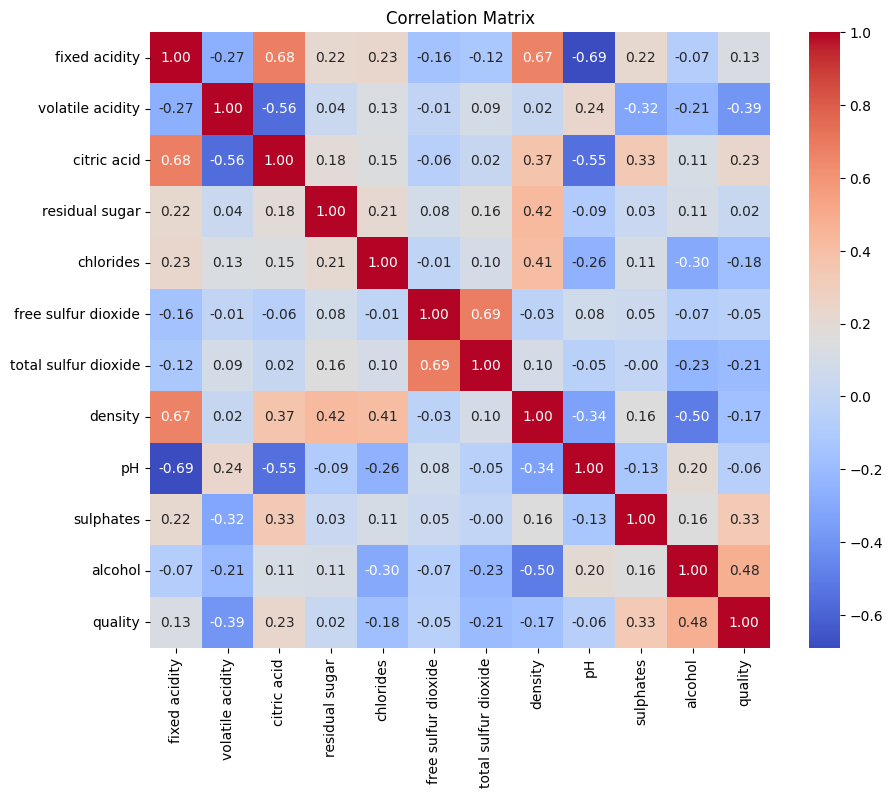

In [ ]:
# Assuming capped_df is your DataFrame
correlation_matrix = capped_df.corr()
# Set the size of the figure
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

# Add title and labels
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# To find the feature with the highest correlation with wine quality, we'll calculate the correlation matrix
correlation_matrix = capped_df.corr()

# Extracting the 'quality' column to find its correlations with other features
quality_correlations = correlation_matrix['quality'].drop('quality')  # Exclude self-correlation

# Finding the feature with the highest correlation with wine quality
most_correlated_feature = quality_correlations.idxmax()
highest_correlation = quality_correlations.max()

most_correlated_feature, highest_correlation


('alcohol', 0.4806412695709493)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Selecting features and target variable
X = capped_df.drop('quality', axis=1)  # Use all features except 'quality' for prediction
y = capped_df['quality']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a Linear Regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Predicting on training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculating R^2 scores
r2_score_train = r2_score(y_train, y_train_pred)
r2_score_test = r2_score(y_test, y_test_pred)

r2_score_train, r2_score_test



(0.3613696461915822, 0.4143334024974512)

In [ ]:

from sklearn import preprocessing


In [ ]:
# prompt: now i want to oerform lasso on this data

from sklearn.linear_model import Lasso

# Create a Lasso regression model with an alpha parameter of 0.01
lasso_model = Lasso(alpha=0.01)

# Fit the model to the training data
lasso_model.fit(X_train, y_train)

# Predict on training and testing sets
y_train_pred_lasso = lasso_model.predict(X_train)
y_test_pred_lasso = lasso_model.predict(X_test)

# Calculate R^2 scores
r2_score_train_lasso = r2_score(y_train, y_train_pred_lasso)
r2_score_test_lasso = r2_score(y_test, y_test_pred_lasso)

# Print R^2 scores
print("R^2 score for training set (Lasso):", r2_score_train_lasso)
print("R^2 score for testing set (Lasso):", r2_score_test_lasso)


R^2 score for training set (Lasso): 0.3422625189975801
R^2 score for testing set (Lasso): 0.3691869430016852


In [ ]:
from sklearn.model_selection import validation_curve


In [ ]:
from sklearn.linear_model import Ridge

# Standardize the data
scaler = preprocessing.StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Create a Ridge regression model with an alpha parameter of 0.1
ridge_model = Ridge(alpha=0.1)

# Fit the model to the training data
ridge_model.fit(X_train_std, y_train)

# Predict on training and testing sets
y_train_pred_ridge = ridge_model.predict(X_train_std)
y_test_pred_ridge = ridge_model.predict(X_test_std)

# Calculate R^2 scores
r2_score_train_ridge = r2_score(y_train, y_train_pred_ridge)
r2_score_test_ridge = r2_score(y_test, y_test_pred_ridge)

# Print R^2 scores
print("R^2 score for training set (Ridge):", r2_score_train_ridge)
print("R^2 score for testing set (Ridge):", r2_score_test_ridge)


R^2 score for training set (Ridge): 0.36136964369533464
R^2 score for testing set (Ridge): 0.4143310044327527


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import graphviz
from sklearn import tree

# Initialize the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Train the model
dt_regressor.fit(X_train, y_train)

# Predict the test set results
y_pred_test = dt_regressor.predict(X_test)
y_pred_train = dt_regressor.predict(X_train)

# Evaluate the model with R² score
r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)

print("R^2 score for training set (Decision Tree):", r2_train)
print("R^2 score for testing set (Decision Tree):", r2_test)

R^2 score for training set (Decision Tree): 1.0
R^2 score for testing set (Decision Tree): -0.040250831595868286


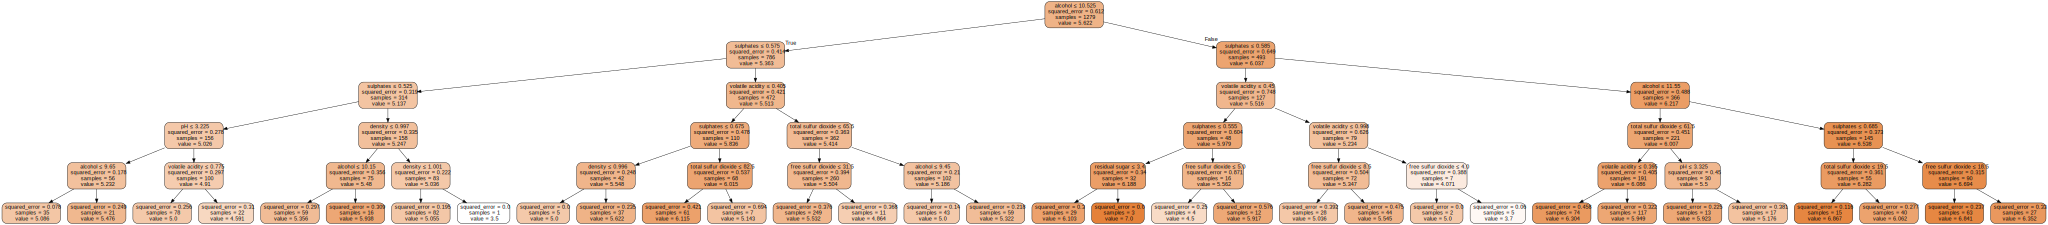

In [ ]:
import graphviz
# Initialize the Decision Tree Regressor with max_depth set to 5
dt_regressor_tuned = DecisionTreeRegressor(max_depth=5, random_state=42)

# Train the model with the new setting
dt_regressor_tuned.fit(X_train, y_train)

# Predict the test and training set results
y_pred_test_tuned = dt_regressor_tuned.predict(X_test)
y_pred_train_tuned = dt_regressor_tuned.predict(X_train)

# Evaluate the model with R² score for the tuned model
r2_test_tuned = r2_score(y_test, y_pred_test_tuned)
r2_train_tuned = r2_score(y_train, y_pred_train_tuned)

# Visualize the Decision Tree
dot_data_tuned = tree.export_graphviz(dt_regressor_tuned, out_file=None,
                                      feature_names=X.columns,
                                      filled=True, rounded=True,
                                      special_characters=True)
graph_tuned = graphviz.Source(dot_data_tuned)

r2_train_tuned, r2_test_tuned, graph_tuned

# Visualize the Decision Tree using Graphviz (re-creating for clarity and focus)
dot_data_final = tree.export_graphviz(dt_regressor_tuned, out_file=None,
                                      feature_names=X.columns,
                                      filled=True, rounded=True,
                                      special_characters=True,
                                      class_names=['quality'])
graph_final = graphviz.Source(dot_data_final)
graph_final

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Predict the test and training set results
y_pred_test_rf = rf_regressor.predict(X_test)
y_pred_train_rf = rf_regressor.predict(X_train)

# Evaluate the model with R² score for the Random Forest model
r2_test_rf = r2_score(y_test, y_pred_test_rf)
r2_train_rf = r2_score(y_train, y_pred_train_rf)

# Feature importances
feature_importances = rf_regressor.feature_importances_

r2_train_rf, r2_test_rf, feature_importances

(0.9271685087044491,
 0.5432860848943992,
 array([0.05362768, 0.1120358 , 0.05341971, 0.04804723, 0.06544453,
        0.04674806, 0.08402604, 0.0519127 , 0.06100788, 0.14795769,
        0.27577269]))

In [ ]:
# Initialize the Random Forest Regressor with tuned parameters
rf_regressor_tuned = RandomForestRegressor(
    n_estimators=150,         # Increased number of trees
    max_depth=10,             # Set maximum depth of each tree
    min_samples_split=10,     # Increase minimum number of samples required to split an internal node
    min_samples_leaf=4,       # Increase minimum number of samples required at a leaf node
    random_state=42
)

# Train the model with the new settings
rf_regressor_tuned.fit(X_train, y_train)

# Predict the test and training set results
y_pred_test_rf_tuned = rf_regressor_tuned.predict(X_test)
y_pred_train_rf_tuned = rf_regressor_tuned.predict(X_train)

# Evaluate the model with R² score for the tuned Random Forest model
r2_test_rf_tuned = r2_score(y_test, y_pred_test_rf_tuned)
r2_train_rf_tuned = r2_score(y_train, y_pred_train_rf_tuned)

r2_train_rf_tuned, r2_test_rf_tuned

(0.7502014232849856, 0.5028065875117321)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
gb_regressor.fit(X_train, y_train)

# Predict the test and training set results
y_pred_test_gb = gb_regressor.predict(X_test)
y_pred_train_gb = gb_regressor.predict(X_train)

# Evaluate the model with R² score for the Gradient Boosting model
r2_test_gb = r2_score(y_test, y_pred_test_gb)
r2_train_gb = r2_score(y_train, y_pred_train_gb)

# Feature importances
feature_importances_gb = gb_regressor.feature_importances_

r2_train_gb, r2_test_gb, feature_importances_gb

(0.6329718249715717,
 0.4610957976629334,
 array([0.04686416, 0.12222148, 0.02938937, 0.02188561, 0.03128481,
        0.02026923, 0.08534756, 0.03819394, 0.04046103, 0.18885067,
        0.37523214]))

In [ ]:
from sklearn.ensemble import AdaBoostRegressor


# Initialize the AdaBoost Regressor with a Decision Tree as the base estimator
ada_regressor = AdaBoostRegressor(
    base_estimator=DecisionTreeRegressor(max_depth=5),  # Using a decision tree with depth of 5
    n_estimators=50,          # Initial number of estimators
    learning_rate=1.0,        # Initial learning rate
    random_state=42
)

# Train the model
ada_regressor.fit(X_train, y_train)

# Predict the test and training set results
y_pred_test_ada = ada_regressor.predict(X_test)
y_pred_train_ada = ada_regressor.predict(X_train)

# Evaluate the model with R² score for the AdaBoost model
r2_test_ada = r2_score(y_test, y_pred_test_ada)
r2_train_ada = r2_score(y_train, y_pred_train_ada)

print("Training R² score:", r2_train_ada)
print("Testing R² score:", r2_test_ada)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Training R² score: 0.6043858540691294
Testing R² score: 0.4301232596745216


In [ ]:
import xgboost as xgb

# Initialize the XGBoost Regressor
xgb_regressor = xgb.XGBRegressor(
    n_estimators=100,  # Number of boosting rounds
    max_depth=3,        # Maximum depth of a tree
    learning_rate=0.1,  # Step size shrinkage used to prevent overfitting
    objective='reg:squarederror',  # Loss function to be minimized
    random_state=42
)

# Train the model on the training data
xgb_regressor.fit(X_train, y_train)

# Predict the test set results
y_pred_test_xgb = xgb_regressor.predict(X_test)
y_pred_train_xgb = xgb_regressor.predict(X_train)

# Evaluate the model using R² score
from sklearn.metrics import r2_score
r2_test_xgb = r2_score(y_test, y_pred_test_xgb)
r2_train_xgb = r2_score(y_train, y_pred_train_xgb)

print("Training R² score:", r2_train_xgb)
print("Testing R² score:", r2_test_xgb)

Training R² score: 0.6083290163213995
Testing R² score: 0.4556014827519984


In [ ]:
def input_features():
    print("Please enter the wine characteristics:")
    features = []
    feature_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                     'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                     'pH', 'sulphates', 'alcohol']
    for feature in feature_names:
        value = float(input(f"{feature}: "))
        features.append(value)
    return features

def predict_wine_quality(model, features):
    features_array = [features]  # Convert list to 2D array to match the input shape for prediction
    prediction = model.predict(features_array)
    return prediction[0]

# Assuming the model is stored in rf_regressor_tuned
features = input_features()
predicted_quality = predict_wine_quality(rf_regressor_tuned, features)
print(f"The predicted wine quality is: {predicted_quality}")

Please enter the wine characteristics:
fixed acidity: 1
volatile acidity: 2
citric acid: 5
residual sugar: 5
chlorides: 1
free sulfur dioxide: 3
total sulfur dioxide: 1
density: 2
pH: 5
sulphates: 10
alcohol: 15
The predicted wine quality is: 6.346202864129332


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
